<a href="https://colab.research.google.com/github/Doji6/Physique-app-aux-SS/blob/main/Convergences_vers_un_vocabulaire_commun_implantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I - Naming Game 


Le code suivant permet de mettre en évidence la convergence vers un vocabulaire commun d'une population à partir d'un modèle fortement inspiré du jeu de langage du Naming Game. La fonction f génère l'évolution du nombre de mots en fonction du temps dans le modèle du Naming Game. On trace ici le nombre total de mots et le nombre de mots différents en fonction du temps. Les graphiques générés présentent bien les 3 différentes phases décrites dans l'article, et la convergence vers un vocabulaire commun. 


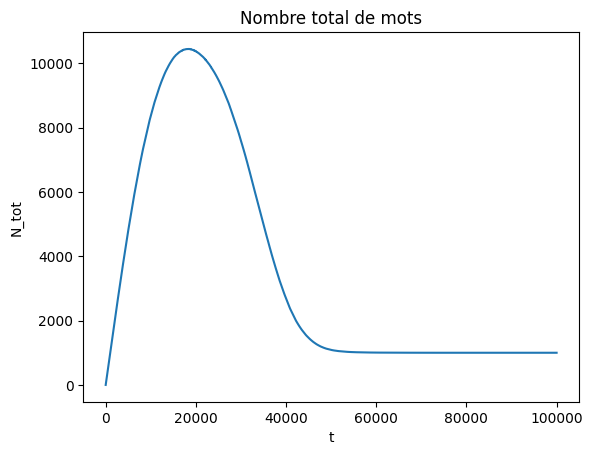

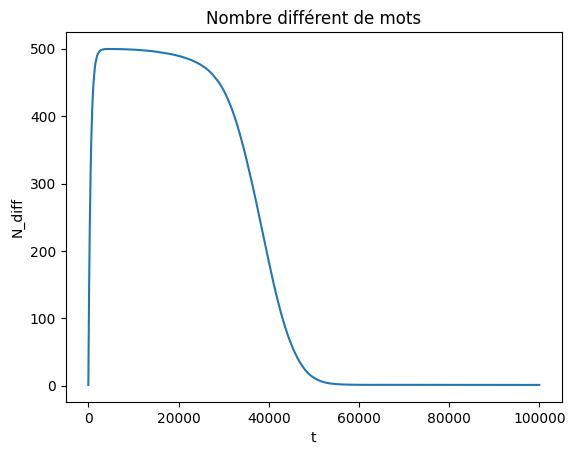

In [ ]:
#s'exécute en 11min, on peut réduire le nombre de répétitions pour être plus rapide

import random
import matplotlib.pyplot as plt

N=1000 #Taille de la population
n=100000 #nombre de répétitions

def f(N,n):
    '''
    entrée:
    N: taille de la population (entier)
    n: nombre de répétitions (entier)

    sortie:
    nombre total de mots à chaque instant (liste)
    nombre de mots différents à chaque instant (liste)
    taux de succès à chaque instant (liste)
    mots connus par chaque personne en fin d'expérience (dictionnaire)
    '''
    vocab={} #dictionnaire où les clés sont les N personnes, et pour chaque clé la valeur est une liste contenant les mots que la personne connaît
    vocab2={} #dictionnaire où les clés sont les différents mots utilisés, et pour chaque clé la valeur est une liste contenant les personnes connaissant le mot
    for k in range(N):
        vocab[k]=[]
    N_tot=[0] #stocke à chaque instant le nombre total de mots
    N_diff=[] #stocke à chaque instant le nombre de mots différents
    n_diff=0 #accumulateur du nombre de mots différents
    N_succ=[] #stocke à chaque instant le taux de succès
    n_succ=0 #accumulateur du nombre de succès
    a=0 #accumulateur permettant de créer les mots
    
    for k in range(n):
        speaker=random.randint(0,N-1) #tirage aléatoire du speaker
        hearer=random.randint(0,N-1) #tirage aléatoire du hearer
        while speaker==hearer: #on s'assure que le hearer est différent du speaker
            hearer=random.randint(0,N-1)
        
        if vocab[speaker]==[]:#le speaker ne connaît pas de mots (début d'expérience)
            a+=1
            n_diff+=1
            N_tot.append(N_tot[-1]+1)
            word=str(a) #le nouveau mot est défini grâce à la variable a
            vocab[speaker].append(word) #on ajoute le nouveau au vocabulaire du speaker
            vocab2[word]=[speaker] #on ajoute le speaker aux connaisseurs du nouveau mot
        
        else:#le speaker connait des mots, on en prend donc un aléatoirement
            word=random.choice(vocab[speaker])
        
        if word in vocab[hearer]:#le hearer connaît le mot du speaker
            n_succ+=1
            N_tot.append(N_tot[-1]-len(vocab[speaker])-len(vocab[hearer])+2)
            
            #on regarde combien de mots vont disparaître pour actualiser n_diff
            for mot in vocab[speaker]:#Cette boucle parcourt les mots que le speaker connaît 
                if mot==word: #on ne touche pas au mot tiré
                    continue
                else:
                    if len(vocab2[mot])==1: #on regarde si le speaker est le dernier connaisseur du mot à enlever
                        n_diff-=1 #on actualise n_diff en conséquence
                    vocab2[mot].remove(speaker) #on enlève le speaker des connaisseurs du mot à enlever
            
            #de même avec le hearer
            for mot in vocab[hearer]:
                if mot==word:
                    continue
                else:
                    if len(vocab2[mot])==1:
                        n_diff-=1
                    vocab2[mot].remove(hearer)
            
            vocab[speaker]=[word] #on ne garde que le mot tiré dans le vocabulaire du speaker 
            vocab[hearer]=[word]#on ne garde que le mot tiré dans le vocabulaire du hearer
        
        else:#le hearer ne connaît pas le mot du speaker
            vocab[hearer].append(word) #on ajoute le mot au vocabulaire du hearer
            vocab2[word].append(hearer) #on ajoute le hearer aux connaisseurs du mot
            N_tot.append(N_tot[-1]+1)
        
        N_succ.append(n_succ/(k+1)) #on actualise les différentes listes
        N_diff.append(n_diff)
    
    return N_tot,N_diff,N_succ,vocab

#on répète l'expérience 1000 fois (les résultats sont stockés dans N_tot et N_diff)
N_tot=[]
N_diff=[]
for i in range(1000): #répétition de l'expérience
  X1,X2,X3,g=f(N,n)
  N_tot.append(X1)
  N_diff.append(X2)

#on calcule la moyenne des résultats
N_tot_moy=[0 for i in range(n)]
N_diff_moy=[0 for i in range(n)]
for i in range(1000):
  for j in range(n):
    N_tot_moy[j]+=N_tot[i][j]
    N_diff_moy[j]+=N_diff[i][j]
for i in range(n):
  N_tot_moy[i]=N_tot_moy[i]/1000
  N_diff_moy[i]=N_diff_moy[i]/1000

#on trace N_tot(t)
X1,X2,X3,g=f(N,n)
plt.plot(N_tot_moy)
plt.title("Nombre total de mots")
plt.xlabel("t")
plt.ylabel("N_tot")
plt.show()

#on trace N_diff(t)
plt.plot(N_diff_moy)
plt.title("Nombre différent de mots")
plt.xlabel("t")
plt.ylabel("N_diff")
plt.show()

#on trace S(t) 
# plt.plot(X3)
# plt.title("Taux de succès")
# plt.xlabel("t")
# plt.ylabel("S")
# plt.plot([3/N**2*t for t in range(n)])
# plt.show()

II- Calcul du nombre maximal de mots atteint et de l'instant correspondant en fonction de la taille de la population

On s'intéresse ici à l'évolution du nombre maximal de mots atteint selon la taille de la population, et du temps correspondant à ce maximum. L'article décrit le comportement suivant: N_max(N)=0,3*N^1,5. Ce résultat est effectivement retrouvé par le graphique généré. 

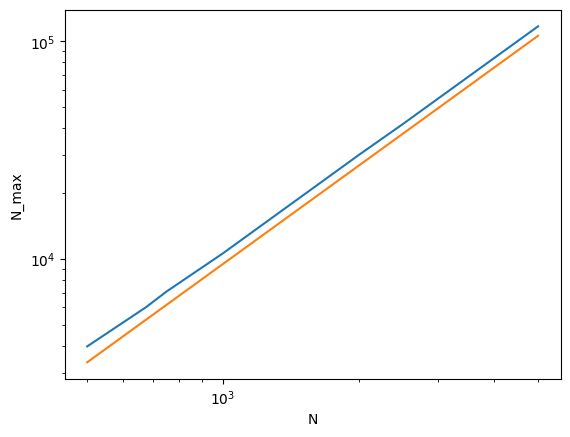

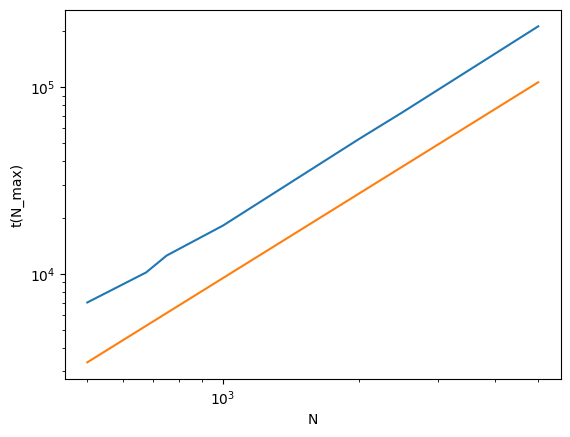

In [ ]:
#s'exécute en 3min, on a enlevé des valeurs de N qui augmentaient considérablement le temps d'exécution, d'où une légère différence avec les graphes présentés
x=[500,675,750,1000,2000,2500,5000] #stocke les différentes tailles de population à tester
y=[0.3*e**1.5 for e in x] #stocke les valeurs de la courbe théorique 
rep=20 #nombre de répétitions de l'expérience
N_max=[[] for k in range(rep)] #stockage des résultats de N_max
t_max=[[] for k in range(rep)] #stockage des résultats de t_max

for k in range(rep):#répétition de l'expérience
    for j in x:
        X1,X2,X3,g=f(j,j*100)
        N_max[k].append(max(X1)) #calcul du N_max
        t_max[k].append(X1.index(N_max[k][-1])) #calcul du t_max
#on calcule la moyenne des résultats
N_max_moy=[]
t_max_moy=[]
for i in range(len(x)):
    acc_N=0
    acc_t=0
    for k in range(rep):
        acc_N+=N_max[k][i]
        acc_t+=t_max[k][i]
    N_max_moy.append(acc_N/rep)
    t_max_moy.append(acc_t/rep)

#on trace N_max(N)
plt.plot(x,N_max_moy)
plt.plot(x,y)
plt.xlabel("N")
plt.ylabel("N_max")
plt.xscale('log')
plt.yscale('log')
plt.show()

#on trace t_max(N)
plt.plot(x,t_max_moy)
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("t(N_max)")
plt.show()

III- Evolution du nombre de connaisseurs d'un mot selon sa popularité

On s'intéresse ici à la popularité d'un mot, i. e. son classement selon le nombre de connaisseurs. On trace la proportion de connaisseurs d'un mot dans la population selon son rang, et ceci pour une taille de population fixée et pour différents instants choisis arbitrairement. On observe une pente exponentielle pour les mots les plus populaires. Cette pente augmente avec le temps, comme le suggère l'article.

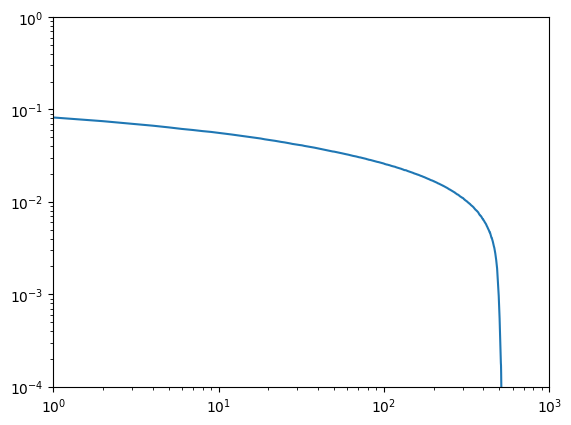

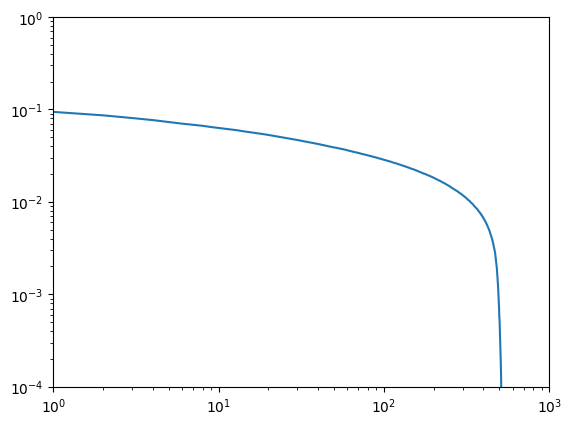

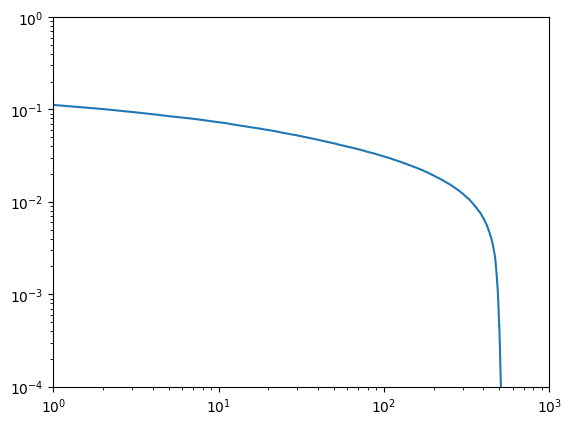

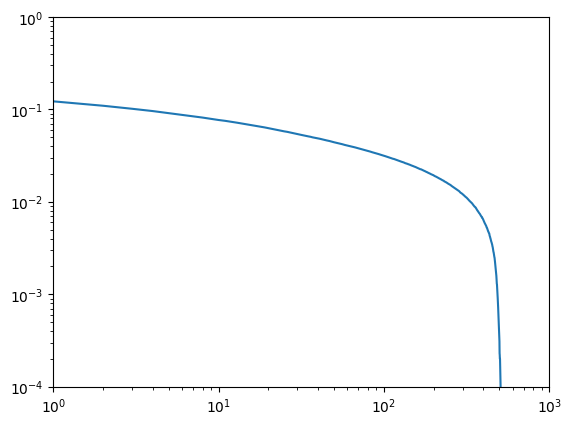

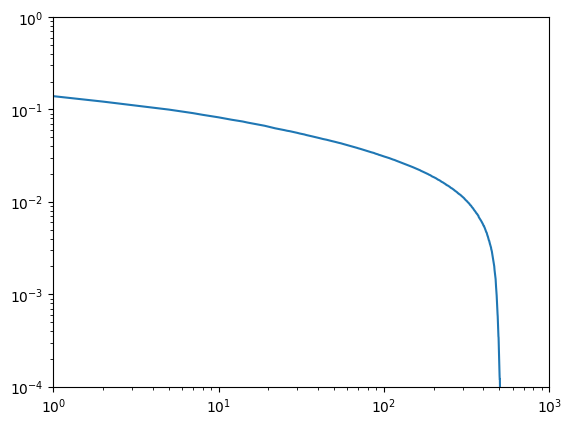

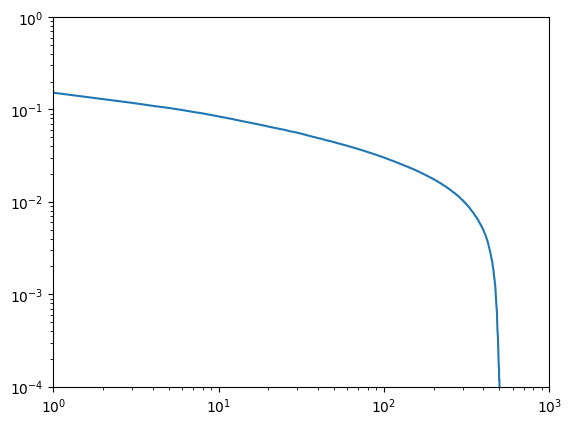

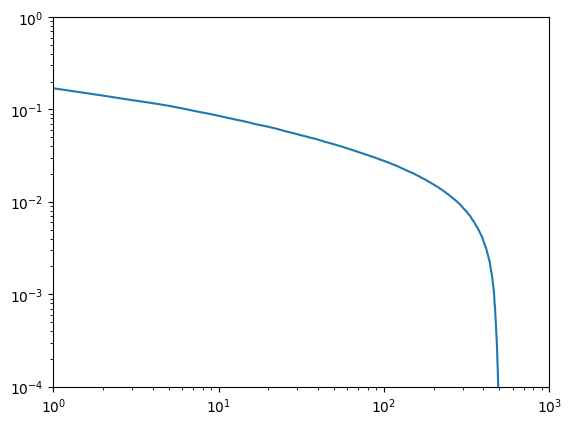

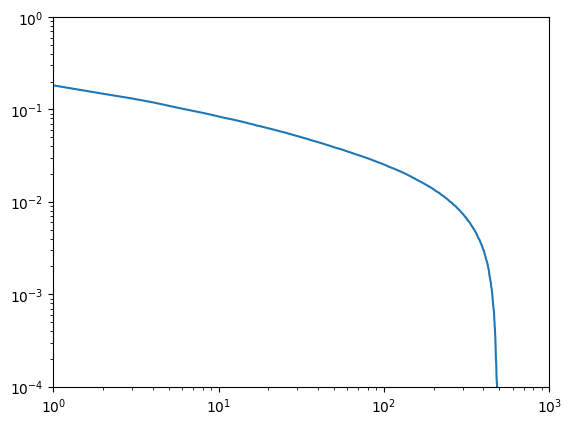

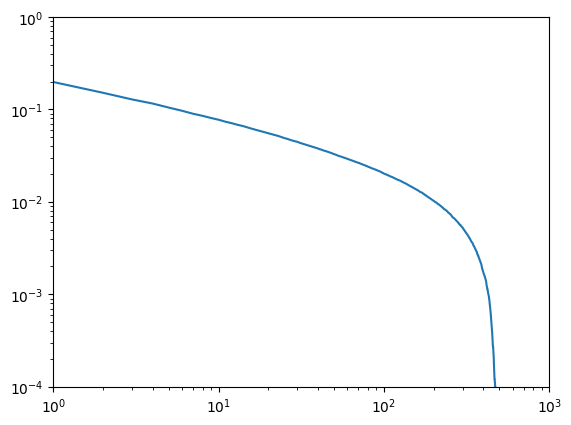

In [ ]:
#s'exécute en 1min20
import random
import matplotlib.pyplot as plt

N=1000 #Taille de la population
n=100000 #nombre de répétitions

def ranking(vocab2,N):
  '''
  entrée:
  vocab2: connaisseurs de chaque mots (dictionnaire)
  N: taille de la population (entier)

  sortie:
  proportion de connaisseurs de chaque mot (liste triée)
  '''
  l=[]
  for word in vocab2:#on ajoute à la liste le  nombre de connaisseurs pour chaque mot
      k=len(vocab2[word])
      l.append(k)
  l.sort(reverse=True) #on trie la liste dans l'ordre décroissant
  for i in range(len(l)): #on divise les valeurs par la taille de la population
      l[i]=l[i]/N
  return l

#cette fonction est la même que celle précédemment utilisée, à l'exception de quelques changement permettant d'avoir les rangs des mots à certains instants
def f2(N,n):
  '''
  entrée:
  N: taille de la population (entier)
  n: nombre de répétitions (entier)

  sortie:
  nombre total de mots à chaque instant (liste)
  nombre de mots différents à chaque instant (liste)
  taux de succès à chaque instant (liste)
  mots connus par chaque personne en fin d'expérience (dictionnaire)
  proportion de connaisseurs de chaque mots (dans l'ordre du plus de connaisseurs au moins de connaisseurs) à diférents instants (liste de listes)
  '''
  vocab={}
  vocab2={}
  for k in range(N):
      vocab[k]=[]
  N_tot=[0]
  N_diff=[]
  n_diff=0
  N_succ=[]
  n_succ=0
  a=0
  rank=[] #cette liste stocke les rangs des mots à différents instants
  test_rank=[N*10,N*12,N*15,N*17,N*20,N*22,N*25,N*27,N*30] #cette liste stocke les valeurs des 9 temps choisis pour regarder les rangs des mots
    
  for k in range(n):
    speaker=random.randint(0,N-1)
    hearer=random.randint(0,N-1)
    while speaker==hearer:
      hearer=random.randint(0,N-1)
        
    if vocab[speaker]==[]:
      a+=1
      n_diff+=1
      N_tot.append(N_tot[-1]+1)
      word=str(a)
      vocab[speaker].append(word)
      vocab2[word]=[speaker]
        
    else:
      word=random.choice(vocab[speaker])
        
    if word in vocab[hearer]:
      n_succ+=1
      N_tot.append(N_tot[-1]-len(vocab[speaker])-len(vocab[hearer])+2)
            
      for mot in vocab[speaker]:
        if mot==word:
          continue
        else:
          if len(vocab2[mot])==1:
            n_diff-=1
          vocab2[mot].remove(speaker)
            
      for mot in vocab[hearer]:
        if mot==word:
          continue
        else:
          if len(vocab2[mot])==1:
            n_diff-=1
          vocab2[mot].remove(hearer)
            
      vocab[speaker]=[word]
      vocab[hearer]=[word]
        
    else:
      vocab[hearer].append(word)
      vocab2[word].append(hearer)
      N_tot.append(N_tot[-1]+1)
        
    N_succ.append(n_succ/(k+1))
    N_diff.append(n_diff)
        
    if k in test_rank: #si l'instant est un des instants choisis, on stocke les rangs des mots
      rank.append(ranking(vocab2,N))
  return N_tot,N_diff,N_succ,vocab,rank

#on répète l'expérience 100 fois
l_rank=[]
for i in range(100):
  x1,x2,x3,g,rank=f(N,n)
  l_rank.append(rank)

#on calcule la moyenne des nombres de connaisseurs d'un mot pour chaque rang, et chaque instant choisi
l_rank_moy=[[0 for k in range(1000)]for j in range(9)]
for i in range(100):
  for j in range(9):
    for k in range(len(l_rank[i][j])):
      l_rank_moy[j][k]+=l_rank[i][j][k]
for j in range(9):
  for k in range(1000):
    l_rank_moy[j][k]=l_rank_moy[j][k]/100

#affichage des graphes aux 9 instants choisis
for j in range(9):
    plt.plot(range(len(l_rank_moy[j])),l_rank_moy[j])
    plt.xscale('log')
    plt.xlim(1,1000)
    plt.ylim(0.0001,1)
    plt.yscale('log')
    plt.show()